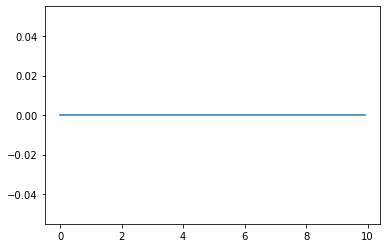

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# y = wx + b
def compute_error_for_line_given_points(b, w, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # computer mean-squared-error
        totalError += (y - (w * x + b)) ** 2
    # average loss for each point
    return totalError / float(len(points))



def step_gradient(b_current, w_current, points, learningRate):
    b_gradient = 0
    w_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # grad_b = 2(wx+b-y)
        b_gradient += (2/N) * ((w_current * x + b_current) - y)
        #print('b_gradient:',b_gradient)
        # grad_w = 2(wx+b-y)*x
        w_gradient += (2/N) * x * ((w_current * x + b_current) - y)
        #print('w_gradient:',w_gradient)
    # update w'
    new_b = b_current - (learningRate * b_gradient)
    new_w = w_current - (learningRate * w_gradient)
    return [new_b, new_w]

def gradient_descent_runner(points, starting_b, starting_w, learning_rate, num_iterations):
    b = starting_b
    w = starting_w
    # update for several times
    for i in range(num_iterations):
        b, w = step_gradient(b, w, np.array(points), learning_rate)
    return [b, w]


def run():
	
    points = np.genfromtxt("data.csv", delimiter=",")
    plt.scatter(points[:,0],points[:,1])  #[[x0,y0][x1,y1]]    #point numpy 二维数组取某一列
    #plt.show()
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_w = 0 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, w = {1}, error = {2}"
          .format(initial_b, initial_w,
                  compute_error_for_line_given_points(initial_b, initial_w, points))
          )
    print("Running...")
    [b, w] = gradient_descent_runner(points, initial_b, initial_w, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, w = {2}, error = {3}".
          format(num_iterations, b, w,
                 compute_error_for_line_given_points(b, w, points))
          )
    px = np.arange(0,100,0.1);
    pw = w
    pb = b
    py = px*w+b;
    plt.plot(px,py)
    plt.show()
    
def drewgrad():
    x = np.arange(0,10,0.1)
    w = 3
    b = 1
    y = x*w+b
    loss =  (y - (w * x + b)) ** 2 
    plt.plot(x,loss)
    plt.show()


if __name__ == '__main__':
    run()
    #drewgrad()